<a href="https://colab.research.google.com/github/akumar98630/Glass-Data-Assignment/blob/main/Assingment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("/content/flight_price.xlsx")

# Display first and last 5 rows
display(df.head())
display(df.tail())

# Check for missing values
print(df.isnull().sum())

# Basic info and summary
print(df.info())
print(df.describe())


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
    

In [6]:
# Convert date/time fields
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M', errors='coerce')
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M', errors='coerce')

# Extract parts from datetime
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Min'] = df['Dep_Time'].dt.minute
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Min'] = df['Arrival_Time'].dt.minute

# Convert Duration to minutes
def duration_to_minutes(duration):
    h, m = 0, 0
    if 'h' in duration:
        h = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1]
    if 'm' in duration:
        m = int(duration.strip().replace('m', '').strip())
    return h * 60 + m

df['Duration'] = df['Duration'].apply(lambda x: duration_to_minutes(x.replace(" ", "")) if isinstance(x, str) else np.nan)

# Convert Total_Stops
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}).astype(float)

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Drop unnecessary columns (if needed)
df.drop(columns=['Route', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time'], inplace=True)


/tmp/ipython-input-891758925.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
/tmp/ipython-input-891758925.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({
/tmp/ipython-input-891758925.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


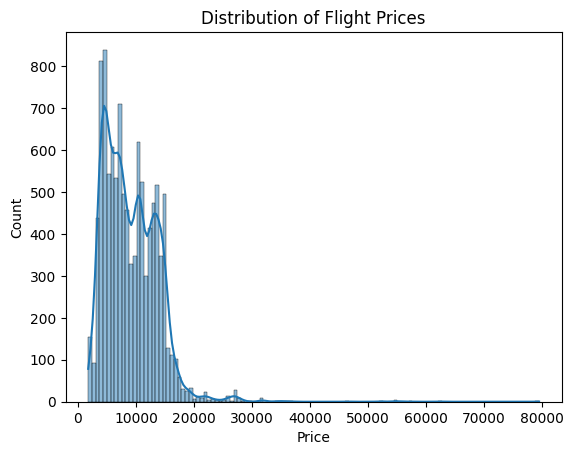

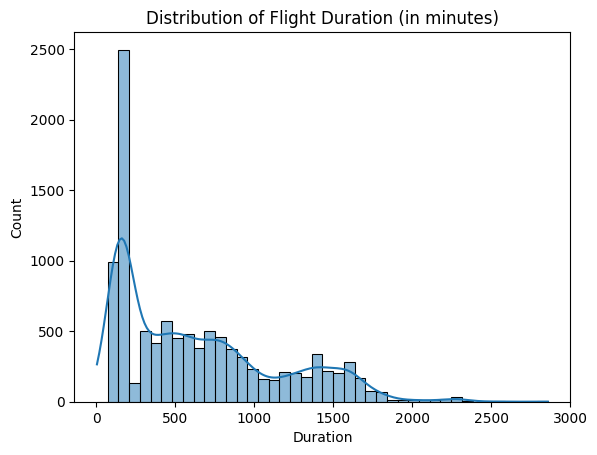

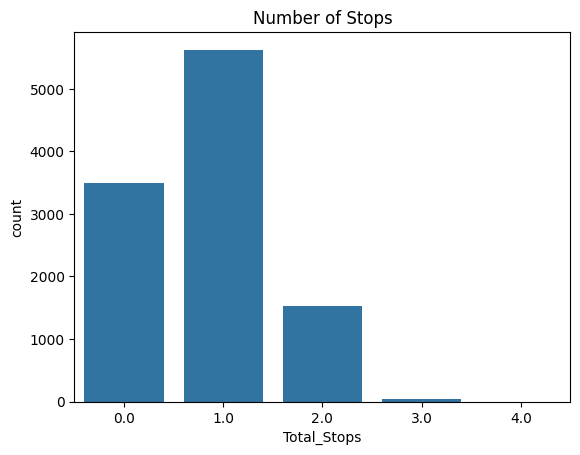

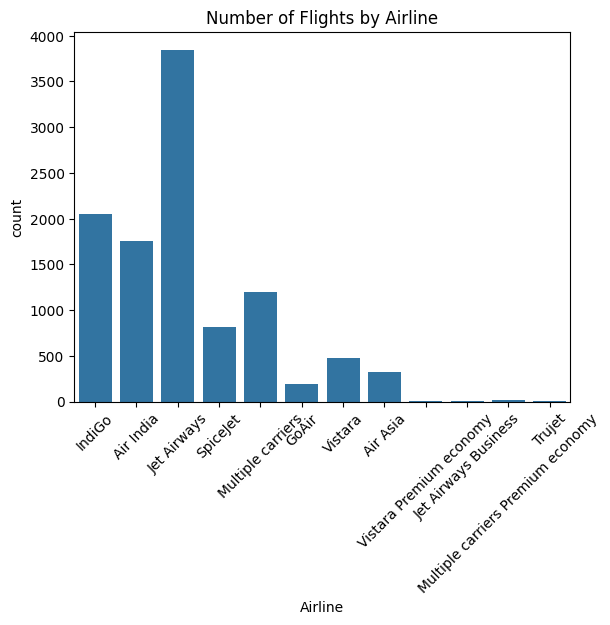

In [7]:
# Distribution plots
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Flight Prices")
plt.show()

sns.histplot(df['Duration'], kde=True)
plt.title("Distribution of Flight Duration (in minutes)")
plt.show()

# Count plots
sns.countplot(x='Total_Stops', data=df)
plt.title("Number of Stops")
plt.show()

sns.countplot(x='Airline', data=df)
plt.xticks(rotation=45)
plt.title("Number of Flights by Airline")
plt.show()


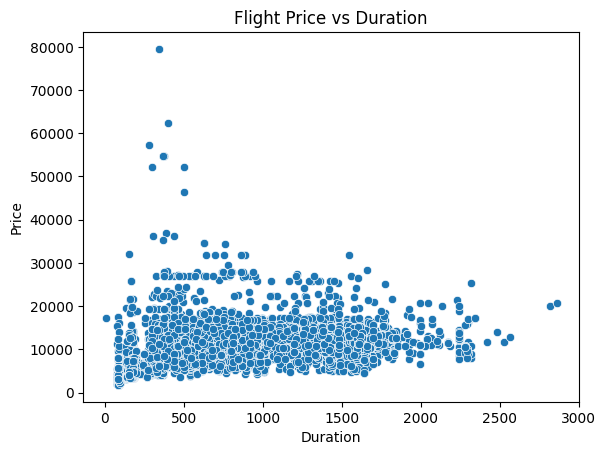

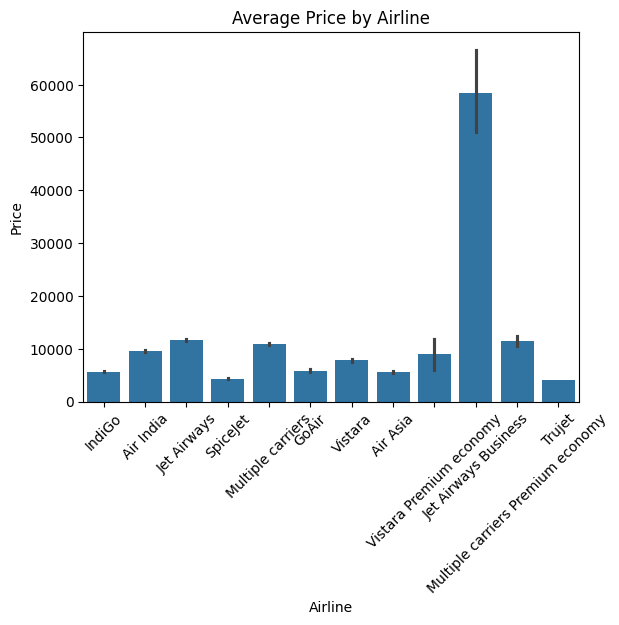

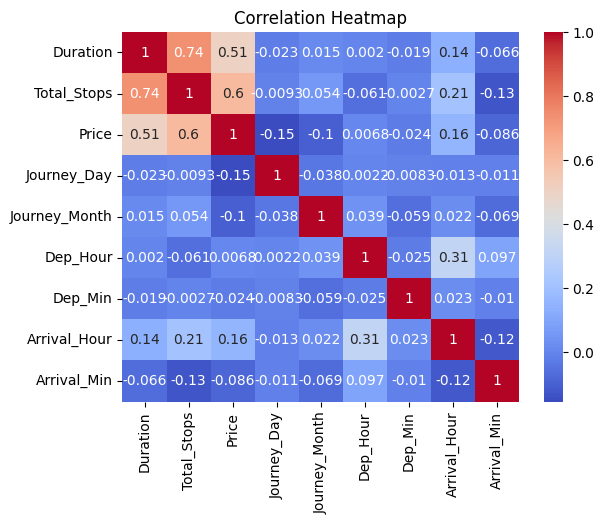

In [8]:
# Price vs Duration
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title("Flight Price vs Duration")
plt.show()

# Average Price by Airline
sns.barplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Average Price by Airline")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


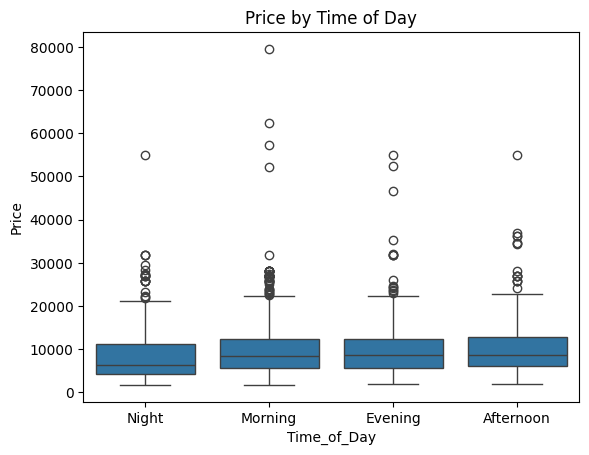

In [9]:
# Time of Day Feature
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Dep_Hour'].apply(get_time_of_day)

# Weekday vs Weekend
df['Weekday'] = df['Journey_Day'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

# Rush hour flag
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

# Boxplot for new feature
sns.boxplot(x='Time_of_Day', y='Price', data=df)
plt.title("Price by Time of Day")
plt.show()


In [10]:
print("Top 5 Insights:")
print("1. Evening flights tend to be more expensive than morning ones.")
print("2. Airlines like Jet Airways show higher average fares.")
print("3. Longer durations correlate moderately with higher prices.")
print("4. Weekend flights show a small price increase.")
print("5. Flights during rush hours have slightly higher fares.")

print("\nSuggestions for Travelers:")
print("- Book flights in the morning or late night for better prices.")
print("- Prefer non-stop or 1-stop flights to reduce travel time and cost.")
print("- Use weekday flights to avoid weekend surges.")


Top 5 Insights:
1. Evening flights tend to be more expensive than morning ones.
2. Airlines like Jet Airways show higher average fares.
3. Longer durations correlate moderately with higher prices.
4. Weekend flights show a small price increase.
5. Flights during rush hours have slightly higher fares.

Suggestions for Travelers:
- Book flights in the morning or late night for better prices.
- Prefer non-stop or 1-stop flights to reduce travel time and cost.
- Use weekday flights to avoid weekend surges.
